<a href="https://colab.research.google.com/github/Tranq781/Predict-Student-s-Dropout-and-Academic-Success/blob/main/Predict_Student's_Dropout_and_Academic_Success.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introduction to the dataset
Bộ dữ liệu này cung cấp cái nhìn tổng qua về sinh viên đang theo học các chương trình cử nhân khác nhau tại một cơ sở giáo dục đại học, bao gồm:
- Dữ liệu nhân khẩu học: các thông tin liên quan có sẵn tại thời điểm nhập học như: tình trạng hôn nhân, ngành học lựa chọn và nhiều thông tin khác.
- Dữ liệu các yếu tố kinh tế - xã hội: bao gồm tỷ lệ thất nghiệp, lạm phát và GDP của khu vực, giúp hiểu rõ hơn về cách các yếu tố kinh tế ảnh hưởng đến tỷ lệ bỏ học hoặc kết quả học tập của sinh viên.
- Dữ liệu kết quả học tập: điểm đánh giá các học phần đã đăng ký, đã được công nhận, đã được chấm điểm cũng như các điểm số tương ứng.
Bộ dữ liệu này có thể được sử dụng để phân tích các yếu tố dự đoán khả năng bỏ học hoặc thành công học tập của sinh viên.
> https://docs.google.com/spreadsheets/d/1KZ8NRzviE_QWHHQ5thyaGfSqAP_KR5g36LOvhqWcW9Q/edit?usp=sharing # chi tiết về các features của bộ dữ liệu


In [39]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelBinarizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.regularizers import l1, l2

In [98]:
df = pd.read_csv(r"/content/drive/MyDrive/Colab Notebooks/Predict Student's Dropout and Academic Success/Data/data.csv", sep = ';')
df

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125.0,1,1,1,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,9773,1,1,120.0,105,1,1,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,9500,1,1,154.0,1,37,37,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9147,1,1,180.0,1,37,37,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

In [100]:
df = df.loc[df['Target'] != 'Enrolled']
df

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125.0,1,1,1,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,9773,1,1,120.0,105,1,1,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,9500,1,1,154.0,1,37,37,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9147,1,1,180.0,1,37,37,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


## Exploratory Data Analysis

<Figure size 800x400 with 0 Axes>

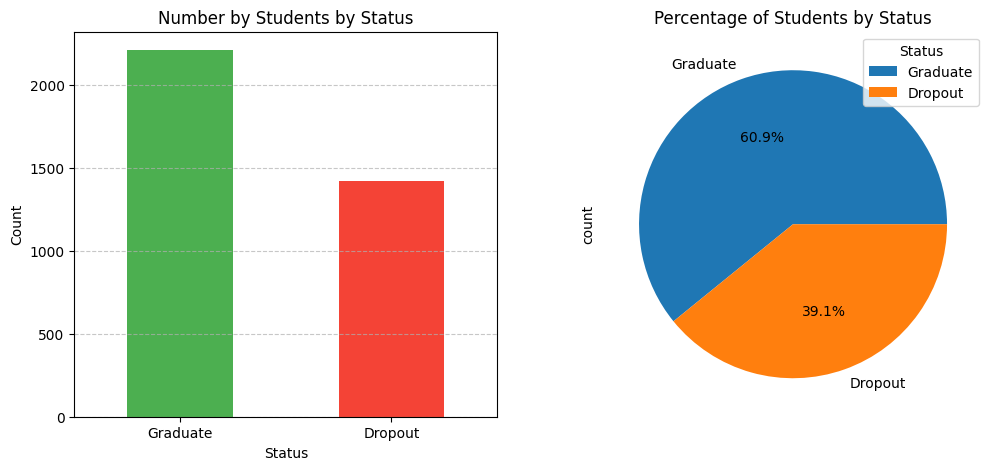

In [101]:
target_count = df['Target'].value_counts()
plt.figure(figsize=(8,4))
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
target_count.plot(kind='bar', color=['#4CAF50', '#F44336', '#2196F3'], ax=ax1)
ax1.set_title('Number by Students by Status')
ax1.set_xlabel('Status')
ax1.set_ylabel('Count')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=0)
ax1.grid(axis='y', linestyle='--', alpha=0.7)

target_count.plot(kind='pie', autopct="%.1f%%", color=['#4CAF50', '#F44336', '#2196F3'], ax=ax2)
ax2.set_title('Percentage of Students by Status')
ax2.legend(title='Status', loc='upper right')
plt.show()

In [102]:
data_pie = df['Target'].value_counts()
data_pie

,count
Target,
Graduate,2209
Dropout,1421


In [103]:
df_ms = df[['Marital status', 'Target']]
df_ms['Marital status'] = df_ms['Marital status'].map({1:"single", 2: "married", 3:"widower", 4:"divorced", 5:"facto union", 6:"legally separated"})
ms_count = df_ms.groupby('Marital status')['Target'].value_counts().unstack()
ms_count['Total'] = ms_count.sum(axis=1)
ms_ratio = ms_count.div(ms_count['Total'], axis=0).round(2) * 100
ms_ratio = ms_ratio.add_suffix(' (%)')
ms_summary = pd.concat([ms_count, ms_ratio], axis=1)
ms_summary
# ms_count.plot(kind='bar', stacked=True, color=['#4CAF50', '#F44336', '#2196F3'])
# plt.title('Number of Students by Marital Status')
# plt.xlabel('Marital Status')
# plt.ylabel('Count')
# plt.xticks(rotation=0)
# plt.legend(title='Target', loc='upper right')
# plt.grid(axis = 'y', linestyle = '--', alpha = 0.7)
# plt.show()

/tmp/ipython-input-872813182.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ms['Marital status'] = df_ms['Marital status'].map({1:"single", 2: "married", 3:"widower", 4:"divorced", 5:"facto union", 6:"legally separated"})


Target,Dropout,Graduate,Total,Dropout (%),Graduate (%),Total (%)
Marital status,,,,,,
divorced,42,33,75,56.0,44.0,100.0
facto union,11,11,22,50.0,50.0,100.0
legally separated,4,1,5,80.0,20.0,100.0
married,179,148,327,55.0,45.0,100.0
single,1184,2015,3199,37.0,63.0,100.0
widower,1,1,2,50.0,50.0,100.0


- Tỷ lệ sinh viên độc thân chiếm đa số (~ 80%) và đây cũng là nhóm sinh viên có tỷ lệ tốt nghiệp cao nhất (~51%).
- Nhóm sinh viên đã lập gia đình có số lượng đông thứ 2 nhưng có tỷ lệ bỏ học khá cao, có thể do gánh nặng về gia đình, thời gian, xã hội, không có thời gian học nên nhóm sinh viên này có khả năng bỏ học cao (~ 47%).

In [104]:

df['Daytime/evening attendance\t'].unique()

array([1, 0])

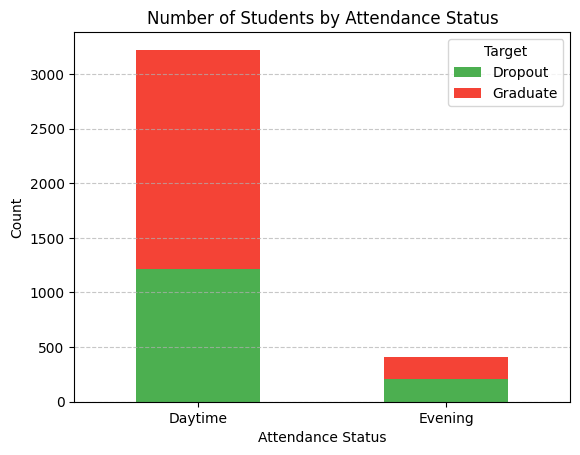

In [105]:
df_at = df[['Daytime/evening attendance\t','Target']]
df_at = df_at.rename(columns={'Daytime/evening attendance\t':'Attendance_status'})
df_at['Attendance_status'] = df_at['Attendance_status'].map({1:'Daytime', 0:'Evening'})
df_at_count = df_at.groupby('Attendance_status').value_counts().unstack()
df_at_count.plot(kind = 'bar', stacked = True,color=['#4CAF50', '#F44336', '#2196F3'])
plt.title('Number of Students by Attendance Status')
plt.xlabel('Attendance Status')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title = 'Target', loc = 'upper right')
plt.grid(axis = 'y', linestyle = '--', alpha = 0.7)
plt.show()

/tmp/ipython-input-892970899.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gender['Gender'] = df_gender['Gender'].map({1: 'Male', 0: 'Female'})


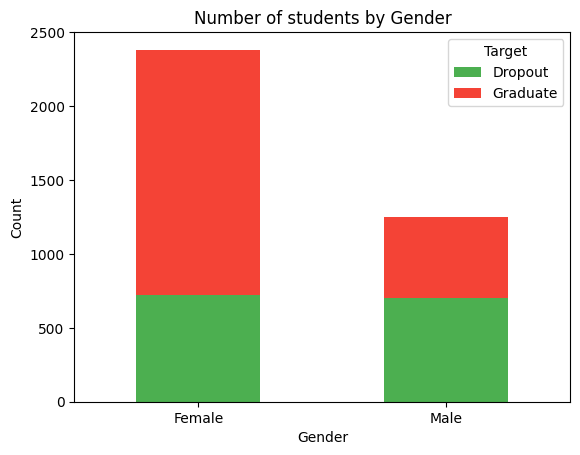

In [117]:
df_gender = df[['Gender','Target']]
df_gender['Gender'] = df_gender['Gender'].map({1: 'Male', 0: 'Female'})
df_gender_count = df_gender.groupby('Gender').value_counts().unstack()
df_gender_count.plot(kind = 'bar', stacked = 'True', color=['#4CAF50', '#F44336', '#2196F3'])
plt.title('Number of students by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation = 0)
plt.legend(title = 'Target', loc = 'upper right')
plt.show()

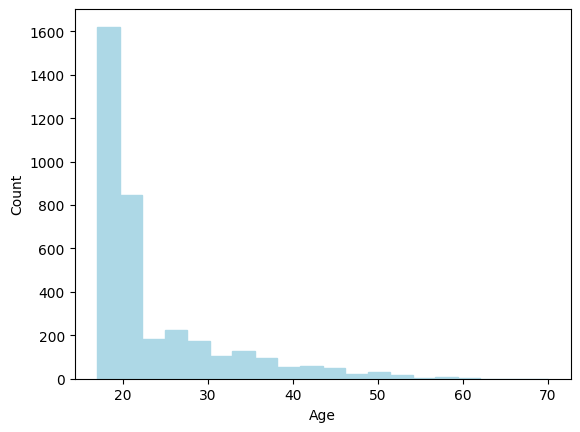

In [106]:
plt.hist(df['Age at enrollment'], bins = 20, color = 'lightblue', edgecolor = 'lightblue')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

In [107]:
df2 = df.copy()
bins = [0, 20, 30, 40, 80]
labels = ['< 20', '20-30', '30-40', '> 40']
df2['age_group'] = pd.cut(df2['Age at enrollment'], bins = bins, labels = labels, right = True)
df2

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target,age_group
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout,< 20
1,1,15,1,9254,1,1,160.0,1,1,3,...,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate,< 20
2,1,1,5,9070,1,1,122.0,1,37,37,...,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout,< 20
3,1,17,2,9773,1,1,122.0,1,38,37,...,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate,< 20
4,2,39,1,8014,0,1,100.0,1,37,38,...,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate,> 40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125.0,1,1,1,...,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate,< 20
4420,1,1,2,9773,1,1,120.0,105,1,1,...,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout,< 20
4421,1,1,1,9500,1,1,154.0,1,37,37,...,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout,20-30
4422,1,1,1,9147,1,1,180.0,1,37,37,...,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate,< 20


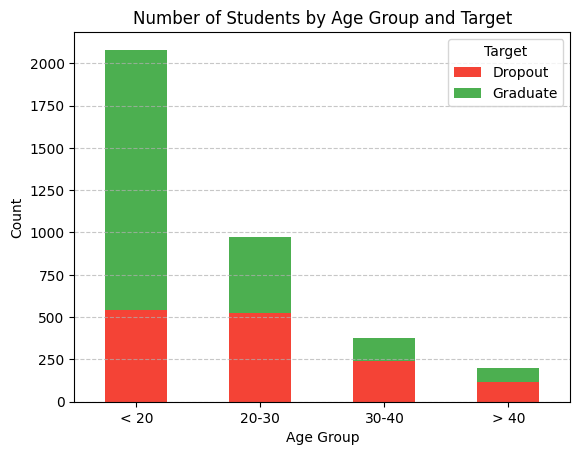

In [108]:
age_target_count = df2.groupby('age_group')['Target'].value_counts().unstack()
age_target_count.plot(kind='bar', stacked=True, color=['#F44336', '#4CAF50', '#2196F3'])
plt.title('Number of Students by Age Group and Target')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Target', loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [109]:
df2_ms = df2[['Target', 'age_group']]
df2_ms = df2_ms.groupby('age_group')['Target'].value_counts().unstack()
df2_ms['Total'] = df2_ms.sum(axis=1)
df2_ms_ratio = df2_ms.div(df2_ms['Total'], axis = 0).round(2)*100
df2_ms_ratio = df2_ms_ratio.add_suffix(' %')
df2_ms_sumary = pd.concat([df2_ms, df2_ms_ratio], axis =1)
df2_ms_sumary

Target,Dropout,Graduate,Total,Dropout %,Graduate %,Total %
age_group,,,,,,
< 20,542,1538,2080,26.0,74.0,100.0
20-30,524,448,972,54.0,46.0,100.0
30-40,241,138,379,64.0,36.0,100.0
> 40,114,85,199,57.0,43.0,100.0


 Số lượng sinh viên trong nhóm tuổi dưới 20 chiếm phần lớn (~58%), đây cũng là nhóm sinh viên có tỷ lệ tốt nghiệp cao nhất (60%). Trong khi các nhóm tuổi còn lại (> 20 tuổi) có tỷ lệ tốt nghiệp thấp hơn (dao động từ 32-38%), điều này cho thấy độ tuổi cũng ảnh hưởng đến tỷ lệ tốt nghiệp của sinh viên.

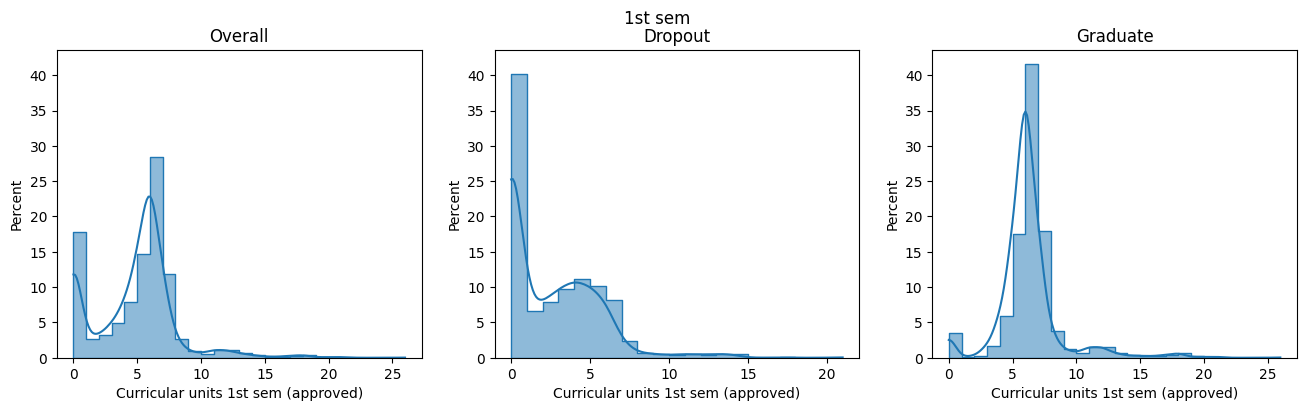

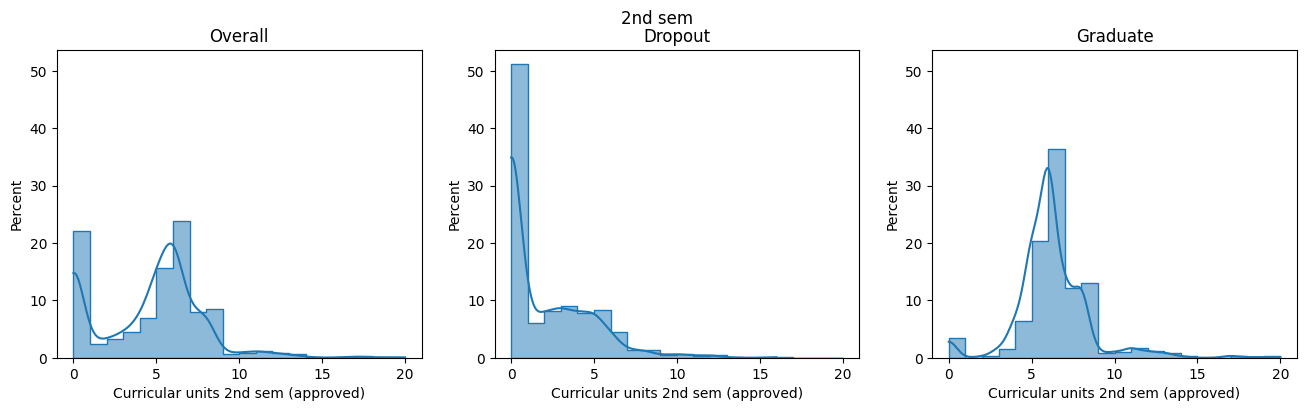

In [110]:
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

fig,ax=plt.subplots(1,3,figsize=(16,4),sharey=False)
fig.suptitle("1st sem")
ax[0].set_title("Overall")
sns.histplot(ax=ax[0],data=df,x="Curricular units 1st sem (approved)",element="step",stat="percent",kde=True,binwidth=1,binrange=(0,20))
plt.legend([],[], frameon=False)
ax[1].set_title("Dropout")
ax[1].sharey(ax[0])
sns.histplot(ax=ax[1],data=df[df["Target"]=="Dropout"],x="Curricular units 1st sem (approved)",element="step",stat="percent",kde=True,binwidth=1,binrange=(0,20))
plt.legend([],[], frameon=False)
ax[2].set_title("Graduate")
ax[2].sharey(ax[0])
sns.histplot(ax=ax[2],data=df[df["Target"]=="Graduate"],x="Curricular units 1st sem (approved)",element="step",stat="percent",kde=True,binwidth=1,binrange=(0,20))
plt.legend([],[], frameon=False)

fig,ax=plt.subplots(1,3,figsize=(16,4),sharey=False)
fig.suptitle("2nd sem")
ax[0].set_title("Overall")
sns.histplot(ax=ax[0],data=df,x="Curricular units 2nd sem (approved)",element="step",stat="percent",kde=True,binwidth=1,binrange=(0,20))
plt.legend([],[], frameon=False)
ax[1].set_title("Dropout")
ax[1].sharey(ax[0])
sns.histplot(ax=ax[1],data=df[df["Target"]=="Dropout"],x="Curricular units 2nd sem (approved)",element="step",stat="percent",kde=True,binwidth=1,binrange=(0,20))
plt.legend([],[], frameon=False)
ax[2].set_title("Graduate")
ax[2].sharey(ax[0])
sns.histplot(ax=ax[2],data=df[df["Target"]=="Graduate"],x="Curricular units 2nd sem (approved)",element="step",stat="percent",kde=True,binwidth=1,binrange=(0,20))
plt.legend([],[], frameon=False)

Biểu đồ cho thấy sự khác biệt rất rõ giữa 2 nhóm Graduate (Tốt nghiệp) và Dropout (Bỏ học) thông qua số tín chỉ sinh viên đạt được trong 2 kì học đầu tiên. Trong cả 2 học kỳ:


*   Nhóm Dropout chủ yếu đạt từ 0-7 tín chỉ
*   Nhóm Graduate chủ yếu đạt từ 5-10 tín chỉ
Xu hướng này thể hiện rõ kết quả học tập ngay từ kì học đầu tiên đã là một yếu tố quan trọng dự báo tỷ lệ tốt nghiệp của sinh viên.

Số lượng tín chỉ mà sinh viên đạt ở học kỳ 1 và 2 có thể sử dụng như một chỉ báo sớm để phát hiện và hỗ trợ sinh viên có nguy cơ bỏ học, góp phần nâng cao tỷ lệ duy trì và tốt nghiệp.

## Data Preprocessing

In [82]:

df['Target'] = df['Target'].map({'Enrolled': 2, 'Graduate': 1, 'Dropout': 0})
df

/tmp/ipython-input-2027854436.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Target'] = df['Target'].map({'Enrolled': 2, 'Graduate': 1, 'Dropout': 0})


,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,0
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,1
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,0
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,1
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125.0,1,1,1,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,1
4420,1,1,2,9773,1,1,120.0,105,1,1,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,0
4421,1,1,1,9500,1,1,154.0,1,37,37,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,0
4422,1,1,1,9147,1,1,180.0,1,37,37,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,1


In [83]:
df.corr()['Target']

,Target
Marital status,-0.100479
Application mode,-0.244507
Application order,0.094355
Course,0.038135
Daytime/evening attendance\t,0.084496
Previous qualification,-0.062323
Previous qualification (grade),0.109464
Nacionality,-0.015516
Mother's qualification,-0.053989
Father's qualification,-0.005865


/usr/local/lib/python3.12/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


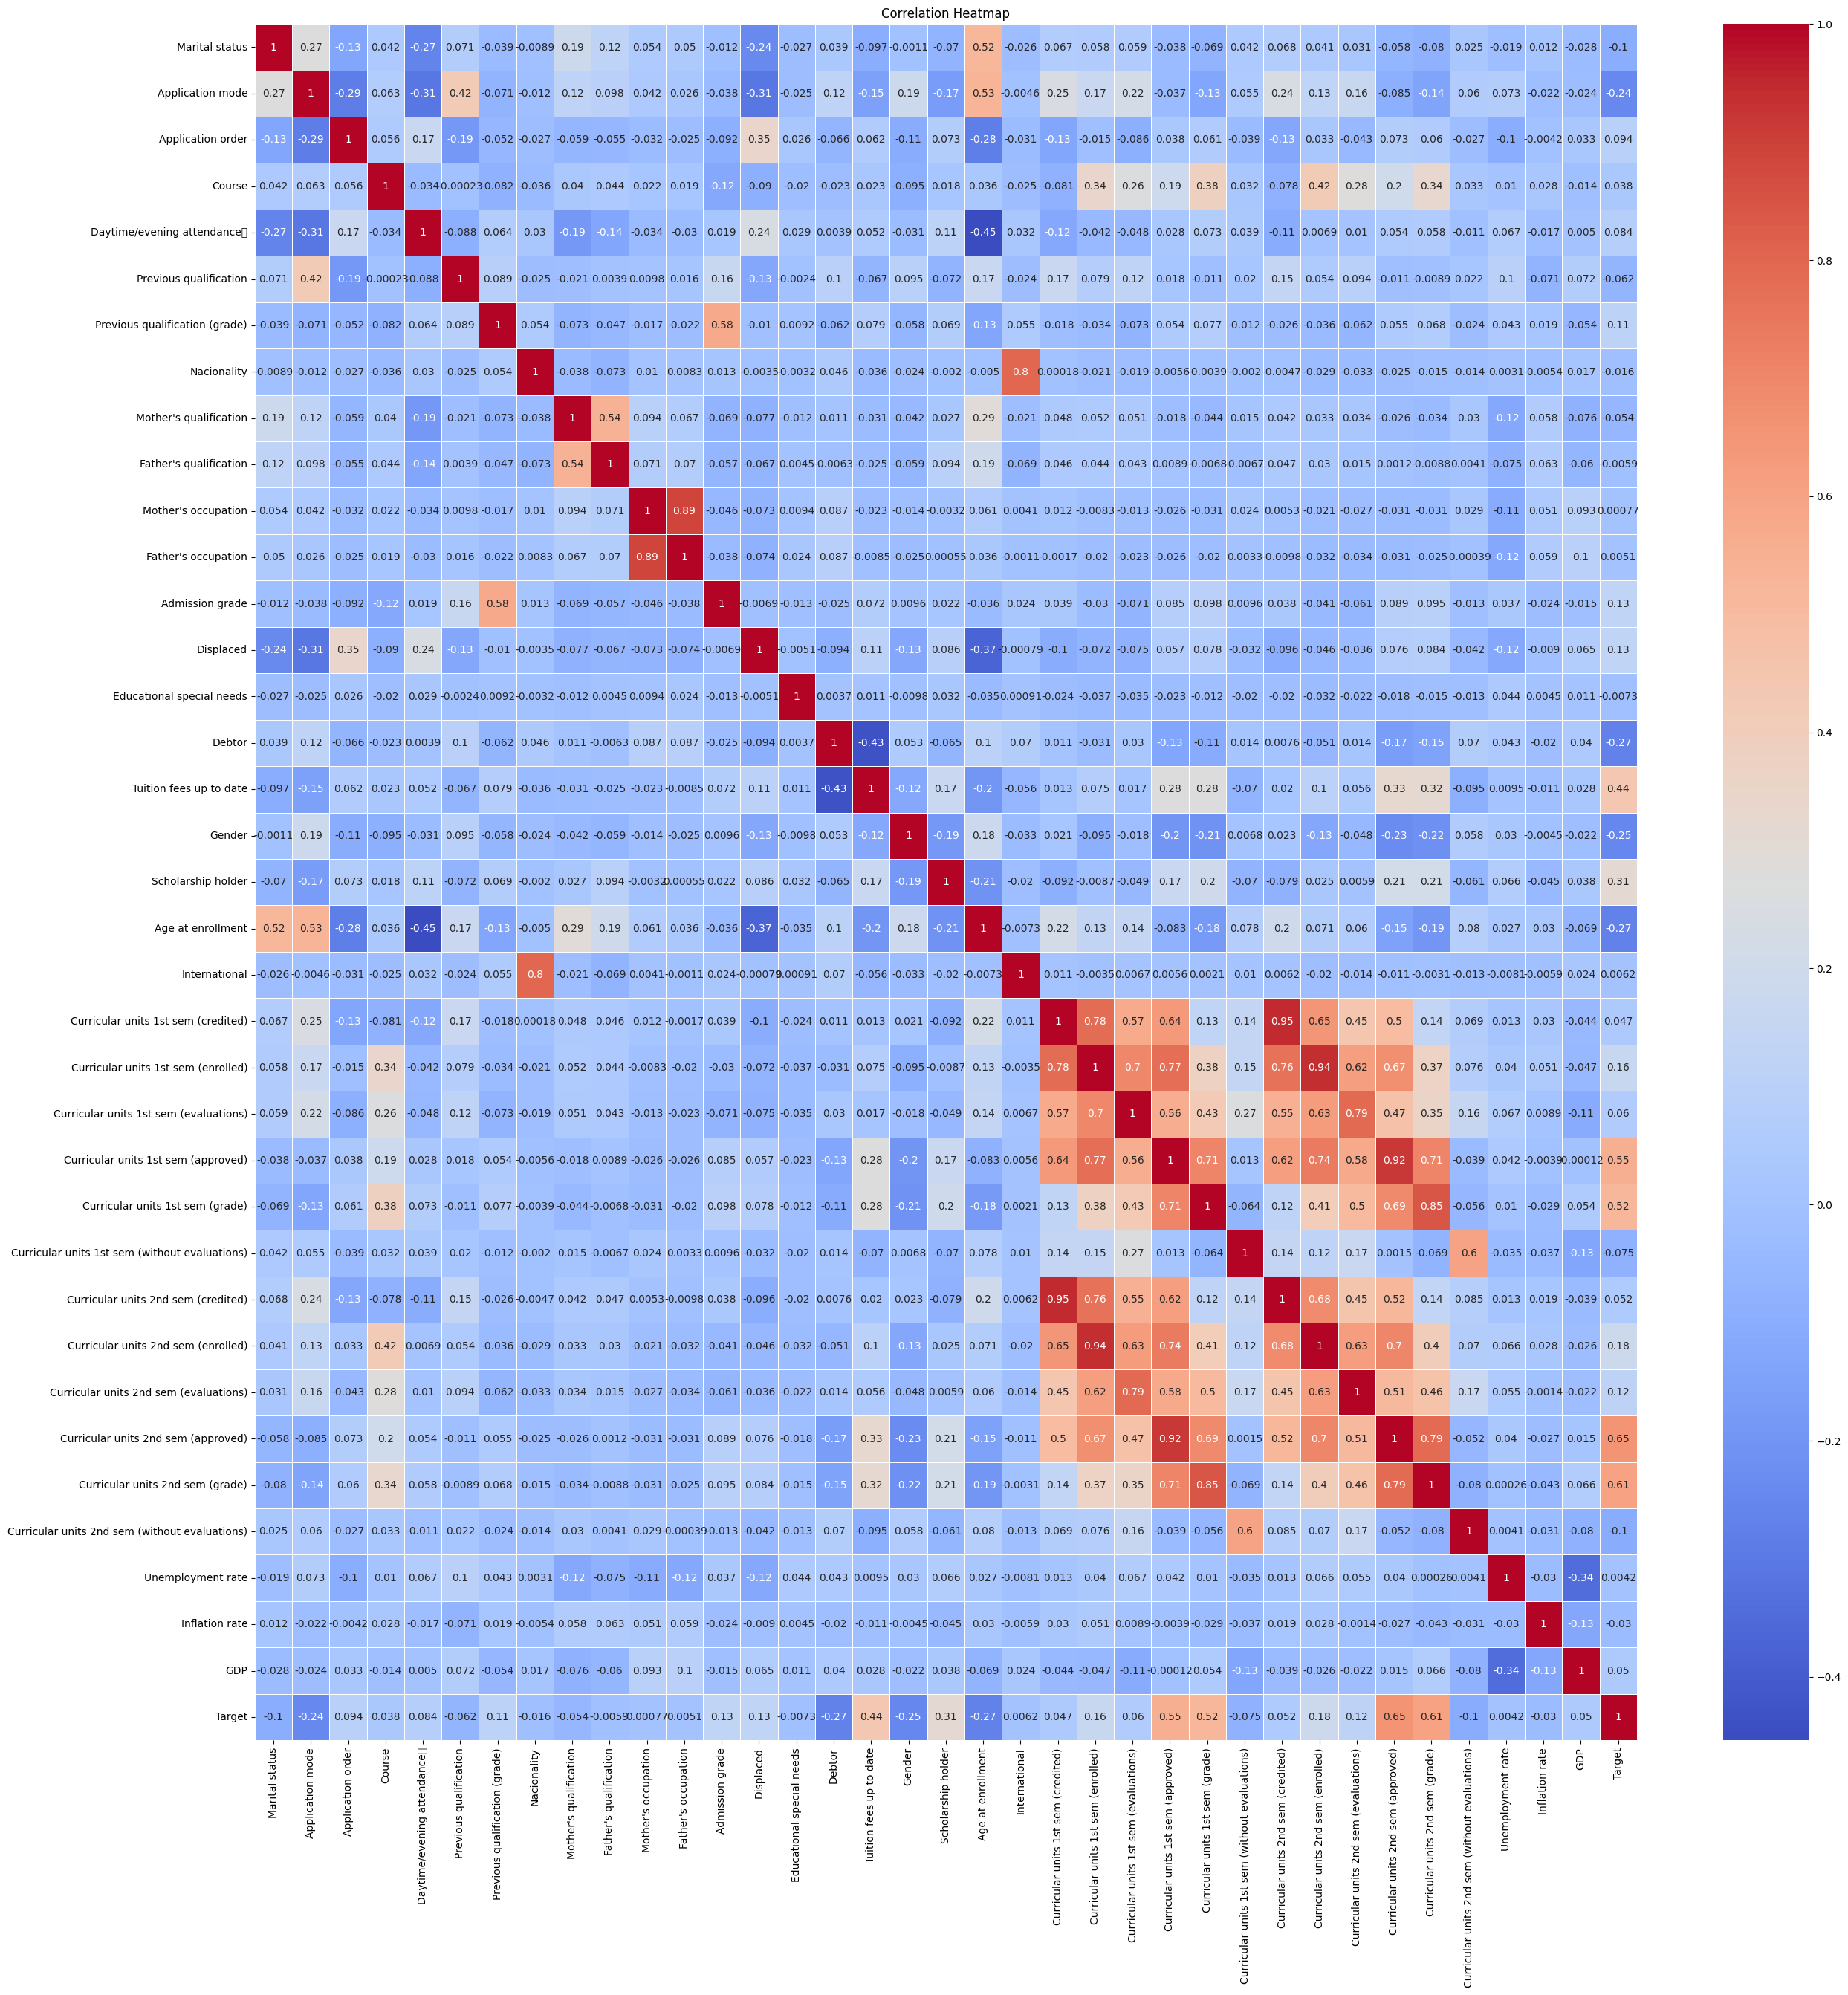

In [84]:
plt.figure(figsize=(30, 30))
sns.heatmap(df.corr() , annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

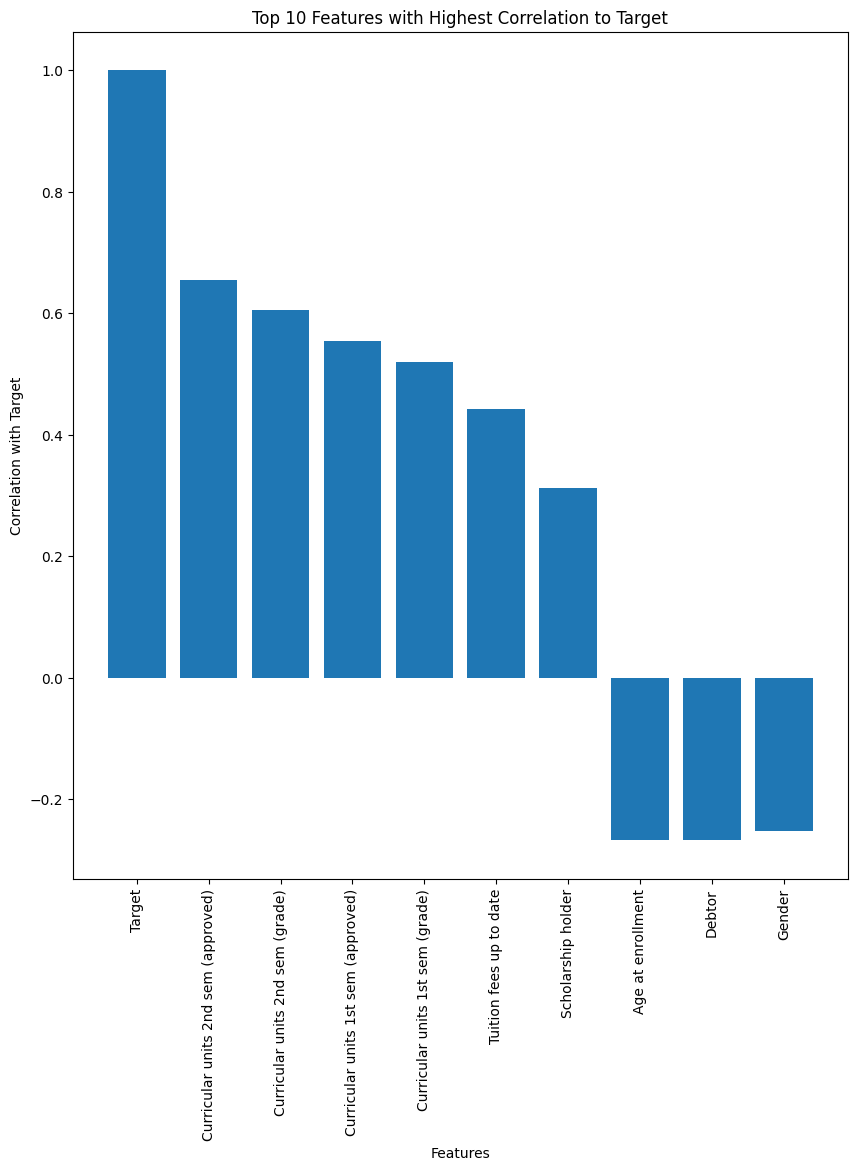

In [85]:
correlations = df.corr()['Target']
top_10_features = correlations.abs().nlargest(10).index
top_10_corr_values = correlations[top_10_features]
plt.figure(figsize=(10, 11))
plt.bar(top_10_features, top_10_corr_values)
plt.xlabel('Features')
plt.ylabel('Correlation with Target')
plt.title('Top 10 Features with Highest Correlation to Target')
plt.xticks(rotation=90)
plt.show()

Biểu đồ thể hiện sự ảnh hưởng của 10 yếu tố chủ yếu đến tỷ lệ tốt nghiệp của sinh viên, các yếu tố này chủ yếu liên quan đến kết quả học tập (số lượng tín chỉ đạt trong các kì, điểm trung bình môn) và tình trạng kinh tế (tình trạng nợ học phí, đóng học phí đúng hạn) của sinh viên, ngoài ra yếu tố tuổi sinh viên cũng có sự ảnh hưởng đến tỷ lệ tốt nghiệp.

***Các biến có tương quan dương với biến mục tiêu:***
*   Curricular units 2nd sem (grade): Điểm trung bình các môn trong học kỳ 2
* Curricular units 2nd sem (approved): Số lượng tín chỉ sinh viên đạt trong học kỳ 2
* Curricular units 1st sem (grade): Điểm trung bình các môn trong học kỳ 1
* Curricular units 1st sem (approved): Số lượng tín chỉ sinh viên đạt trong kỳ 1
* Tuition fees up to date: Tình trạng đóng học phí đúng hạn
* Curricular units 2nd sem (evaluations): Số lần tham gia các buổi thi trong kỳ 2
* Curricular units 1st sem (evaluations): Số lần tham gia các buổi thi trong kỳ 1

Sinh viên có kết quả học tập tốt, đóng học phí đúng hạn có khả năng tốt nghiệp cao hơn.

***Các biến có tương quan âm với biến mục tiêu:***
* Age at enrollment: Tuổi nhập học
* Debtor: Nợ học phí

Những sinh viên có tuổi nhập học cao và có nợ học phí có xu hướng làm giảm khả năng đạt mục tiêu tốt nghiệp

Kết quả cho thấy nhà trường có thể sử dụng các yếu tố liên quan đến điểm số, số tín chỉ đạt qua mỗi kì, tình trạng nộp học phí của sinh viên để xây dựng các mô hình dự báo tỷ lệ tốt nghiệp. Cụ thể:
* Theo dõi điểm và số học phần đạt trong học kỳ 1 và 2 để nhận diện sớm sinh viên có nguy cơ bỏ học.
* Kiểm soát trạng thái đóng học phí nhằm phát hiện những trường hợp gặp khó khăn tài chính và đưa ra chính sách hỗ trợ phù hợp.
* Lưu ý tuổi nhập học, bởi sinh viên nhập học muộn có thể cần nhiều hỗ trợ học thuật hoặc tâm lý hơn.

Việc áp dụng các chỉ báo này sẽ giúp trường có cơ sở can thiệp sớm, từ đó nâng cao tỷ lệ duy trì sinh viên và tỷ lệ tốt nghiệp.

## Building Models

In [86]:
from sklearn.model_selection import train_test_split
X = df.drop('Target', axis = 1)
y = df['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
print("Traning set size: ", X_train.shape)
print("Test set size: ", X_test.shape)

Traning set size:  (2904, 36)
Test set size:  (726, 36)


In [87]:
X_train

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
1116,1,1,1,9070,1,1,160.0,1,3,38,...,0,0,6,0,0,0.000000,0,10.8,1.4,1.74
4372,1,39,1,9003,1,1,130.0,1,12,12,...,0,0,6,10,0,0.000000,0,12.4,0.5,1.79
4371,1,1,6,9500,1,1,118.0,1,38,19,...,0,0,8,8,8,14.925000,0,12.4,0.5,1.79
2869,2,39,1,9991,0,19,133.1,1,37,37,...,0,0,5,5,5,14.400000,0,7.6,2.6,0.32
1638,1,39,1,9670,1,9,133.1,1,37,37,...,0,0,5,5,0,0.000000,0,9.4,-0.8,-3.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1359,1,42,1,9119,1,1,120.0,1,19,37,...,0,0,5,0,0,0.000000,0,15.5,2.8,-4.06
1559,1,1,3,9500,1,1,141.0,1,3,19,...,0,0,8,8,8,13.248750,0,9.4,-0.8,-3.12
1037,1,1,1,9238,1,1,154.0,1,1,3,...,0,0,6,6,6,13.166667,0,10.8,1.4,1.74
4278,1,1,3,9773,1,1,123.0,1,1,1,...,0,0,6,6,6,15.333333,0,11.1,0.6,2.02


In [88]:
from xgboost import XGBClassifier
models = [
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('Logistic Regression', LogisticRegression(max_iter = 1000)),
    ('Bernoulli Naive Bayes', BernoulliNB()),
    ('XGBoost', XGBClassifier(use_label_encoder=False, eval_metric='logloss'))
]

param_grids = {
    'Decision Tree': {'max_depth': [5, 10, 20], 'criterion': ['gini', 'entropy']},
    'Random Forest': {'n_estimators': [10, 100], 'max_depth': [5, 10, 20]},
    'Logistic Regression': {'C': [1, 10], 'solver': ['lbfgs', 'liblinear']},
    'Bernoulli Naive Bayes': {'alpha': [0.001, 0.1, 1]},
    'XGBoost': {
        'n_estimators': [50, 100],
        'max_depth': [3, 5, 10],
        'learning_rate': [0.01, 0.1, 0.2],
        'subsample': [0.8, 1.0],
        'colsample_bytree': [0.8, 1.0]
    }
}

In [65]:
results = []   # list để lưu kết quả

def append_metrics(model_name, accuracy, precision, recall, f1):
    results.append({
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-score': f1
    })


In [89]:
best_models = {}

for name, model in models:
    print(f"\nTraining {name}...")
    grid_search = GridSearchCV(estimator=model, param_grid=param_grids[name], cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)

    best_model = grid_search.best_estimator_
    best_models[name] = best_model

    y_train_pred = best_model.predict(X_train)
    y_test_pred = best_model.predict(X_test)

    print(f"Best parameters for {name}: {grid_search.best_params_}")
    print(f"Training accuracy for {name}: {accuracy_score(y_train, y_train_pred):.4f}")
    print(f"Test accuracy for {name}: {accuracy_score(y_test, y_test_pred):.4f}")
    print(f"Classification Report for {name} on test set:\n{classification_report(y_test, y_test_pred)}")

print("\nTraining complete. Best models:")
for model_name, model in best_models.items():
    print(f"{model_name}: {model}")


Training Decision Tree...
Best parameters for Decision Tree: {'criterion': 'gini', 'max_depth': 5}
Training accuracy for Decision Tree: 0.9143
Test accuracy for Decision Tree: 0.8829
Classification Report for Decision Tree on test set:
              precision    recall  f1-score   support

           0       0.89      0.79      0.84       277
           1       0.88      0.94      0.91       449

    accuracy                           0.88       726
   macro avg       0.88      0.87      0.87       726
weighted avg       0.88      0.88      0.88       726


Training Random Forest...
Best parameters for Random Forest: {'max_depth': 20, 'n_estimators': 100}
Training accuracy for Random Forest: 0.9997
Test accuracy for Random Forest: 0.8912
Classification Report for Random Forest on test set:
              precision    recall  f1-score   support

           0       0.89      0.82      0.85       277
           1       0.89      0.94      0.91       449

    accuracy                      

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:20:53] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [90]:
# Thử nghiệm trên bộ dữ liệu khi chỉ giữ lại các yếu tố ảnh hưởng chủ yếu đến tỷ lệ tốt nghiệp
from sklearn.model_selection import train_test_split

df_d = df[['Target','Curricular units 2nd sem (grade)', 'Curricular units 2nd sem (approved)', 'Curricular units 1st sem (grade)', 'Curricular units 1st sem (approved)',
           'Tuition fees up to date','Curricular units 2nd sem (evaluations)','Curricular units 1st sem (evaluations)','Age at enrollment','Debtor']]

X = df_d.drop('Target', axis = 1)
y = df_d['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
print("Traning set size: ", X_train.shape)
print("Test set size: ", X_test.shape)

Traning set size:  (2904, 9)
Test set size:  (726, 9)


In [91]:
best_models = {}

for name, model in models:
    print(f"\nTraining {name}...")
    grid_search = GridSearchCV(estimator=model, param_grid=param_grids[name], cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)

    best_model = grid_search.best_estimator_
    best_models[name] = best_model

    y_train_pred = best_model.predict(X_train)
    y_test_pred = best_model.predict(X_test)

    print(f"Best parameters for {name}: {grid_search.best_params_}")
    print(f"Training accuracy for {name}: {accuracy_score(y_train, y_train_pred):.4f}")
    print(f"Test accuracy for {name}: {accuracy_score(y_test, y_test_pred):.4f}")
    print(f"Classification Report for {name} on test set:\n{classification_report(y_test, y_test_pred)}")

print("\nTraining complete. Best models:")
for model_name, model in best_models.items():
    print(f"{model_name}: {model}")


Training Decision Tree...
Best parameters for Decision Tree: {'criterion': 'gini', 'max_depth': 5}
Training accuracy for Decision Tree: 0.9005
Test accuracy for Decision Tree: 0.8912
Classification Report for Decision Tree on test set:
              precision    recall  f1-score   support

           0       0.89      0.82      0.85       277
           1       0.89      0.94      0.91       449

    accuracy                           0.89       726
   macro avg       0.89      0.88      0.88       726
weighted avg       0.89      0.89      0.89       726


Training Random Forest...
Best parameters for Random Forest: {'max_depth': 5, 'n_estimators': 10}
Training accuracy for Random Forest: 0.9012
Test accuracy for Random Forest: 0.8926
Classification Report for Random Forest on test set:
              precision    recall  f1-score   support

           0       0.91      0.80      0.85       277
           1       0.88      0.95      0.92       449

    accuracy                        

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:23:28] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [25]:
# Cải thiện mô hình với SMOTE do imbalanced data
!pip install imbalanced-learn

In [92]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE

In [93]:
print(y_train.value_counts(normalize=True))
print(y_test.value_counts(normalize=True))

Target
1    0.606061
0    0.393939
Name: proportion, dtype: float64
Target
1    0.618457
0    0.381543
Name: proportion, dtype: float64


In [94]:
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)
print("Sau SMOTE:")
print(y_train_res.value_counts())

Sau SMOTE:
Target
0    1760
1    1760
Name: count, dtype: int64


In [95]:
y_train_res

,Target
0,0
1,0
2,1
3,1
4,0
...,...
3515,0
3516,0
3517,0
3518,0


In [96]:
best_models = {}

for name, model in models:
    print(f"\nTraining {name} with SMOTE...")

    grid_search = GridSearchCV(
        estimator=model,
        param_grid=param_grids[name],
        cv=5,
        scoring='accuracy',
        n_jobs=-1
    )

    # Train trên dữ liệu đã resample
    grid_search.fit(X_train_res, y_train_res)

    best_model = grid_search.best_estimator_
    best_models[name] = best_model

    # Dự đoán train/test
    y_train_pred = best_model.predict(X_train_res)   # train (resampled)
    y_test_pred = best_model.predict(X_test)         # test (gốc, không resample)

    print(f"Best parameters for {name}: {grid_search.best_params_}")
    print(f"Training accuracy (resampled) for {name}: {accuracy_score(y_train_res, y_train_pred):.4f}")
    print(f"Test accuracy for {name}: {accuracy_score(y_test, y_test_pred):.4f}")
    print(f"Classification Report for {name} on test set:\n{classification_report(y_test, y_test_pred)}")

print("\nTraining complete with SMOTE. Best models:")
for model_name, model in best_models.items():
    print(f"{model_name}: {model}")



Training Decision Tree with SMOTE...
Best parameters for Decision Tree: {'criterion': 'gini', 'max_depth': 5}
Training accuracy (resampled) for Decision Tree: 0.8955
Test accuracy for Decision Tree: 0.8884
Classification Report for Decision Tree on test set:
              precision    recall  f1-score   support

           0       0.85      0.86      0.85       277
           1       0.91      0.91      0.91       449

    accuracy                           0.89       726
   macro avg       0.88      0.88      0.88       726
weighted avg       0.89      0.89      0.89       726


Training Random Forest with SMOTE...
Best parameters for Random Forest: {'max_depth': 20, 'n_estimators': 100}
Training accuracy (resampled) for Random Forest: 0.9812
Test accuracy for Random Forest: 0.8829
Classification Report for Random Forest on test set:
              precision    recall  f1-score   support

           0       0.86      0.83      0.84       277
           1       0.90      0.91      0.91

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:24:45] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best parameters for XGBoost: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 100, 'subsample': 0.8}
Training accuracy (resampled) for XGBoost: 0.9688
Test accuracy for XGBoost: 0.8857
Classification Report for XGBoost on test set:
              precision    recall  f1-score   support

           0       0.87      0.83      0.85       277
           1       0.90      0.92      0.91       449

    accuracy                           0.89       726
   macro avg       0.88      0.87      0.88       726
weighted avg       0.89      0.89      0.89       726


Training complete with SMOTE. Best models:
Decision Tree: DecisionTreeClassifier(max_depth=5)
Random Forest: RandomForestClassifier(max_depth=20)
Logistic Regression: LogisticRegression(C=10, max_iter=1000, solver='liblinear')
Bernoulli Naive Bayes: BernoulliNB(alpha=0.001)
XGBoost: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
  

In [31]:
# Áp dụng SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [32]:
X_resampled

,Curricular units 2nd sem (grade),Curricular units 2nd sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (approved),Tuition fees up to date,Curricular units 2nd sem (evaluations),Curricular units 1st sem (evaluations),Age at enrollment,Debtor
0,0.000000,0,0.000000,0,1,5,5,35,0
1,11.333333,2,11.666667,3,1,14,13,25,0
2,13.625000,6,14.166667,6,1,8,6,22,0
3,0.000000,0,0.000000,0,1,0,0,42,0
4,13.900000,6,13.900000,6,1,7,7,22,0
...,...,...,...,...,...,...,...,...,...
5368,12.582358,3,12.123537,4,1,10,9,19,0
5369,0.000000,0,0.000000,0,1,0,0,18,0
5370,11.942506,3,12.034397,2,1,11,11,18,0
5371,12.209149,6,13.642123,5,1,9,9,19,0


In [33]:
best_models = {}

for name, model in models:
    print(f"\nTraining {name} with SMOTE...")

    grid_search = GridSearchCV(
        estimator=model,
        param_grid=param_grids[name],
        cv=5,
        scoring='accuracy',
        n_jobs=-1
    )

    # Train trên dữ liệu đã resample
    grid_search.fit(X_resampled, y_resampled)

    best_model = grid_search.best_estimator_
    best_models[name] = best_model

    # Dự đoán train/test
    y_train_pred = best_model.predict(X_resampled)   # train (resampled)
    y_test_pred = best_model.predict(X_test)         # test (gốc, không resample)

    print(f"Best parameters for {name}: {grid_search.best_params_}")
    print(f"Training accuracy (resampled) for {name}: {accuracy_score(y_resampled, y_train_pred):.4f}")
    print(f"Test accuracy for {name}: {accuracy_score(y_test, y_test_pred):.4f}")
    print(f"Classification Report for {name} on test set:\n{classification_report(y_test, y_test_pred)}")

print("\nTraining complete with SMOTE. Best models:")
for model_name, model in best_models.items():
    print(f"{model_name}: {model}")



Training Decision Tree with SMOTE...
Best parameters for Decision Tree: {'criterion': 'entropy', 'max_depth': 20}
Training accuracy (resampled) for Decision Tree: 0.9685
Test accuracy for Decision Tree: 0.6497
Classification Report for Decision Tree on test set:
              precision    recall  f1-score   support

           0       0.71      0.67      0.69       316
           1       0.76      0.72      0.74       418
           2       0.32      0.42      0.36       151

    accuracy                           0.65       885
   macro avg       0.60      0.60      0.60       885
weighted avg       0.67      0.65      0.66       885


Training Random Forest with SMOTE...
Best parameters for Random Forest: {'max_depth': 20, 'n_estimators': 100}
Training accuracy (resampled) for Random Forest: 0.9734
Test accuracy for Random Forest: 0.6994
Classification Report for Random Forest on test set:
              precision    recall  f1-score   support

           0       0.81      0.67      

In [34]:
df

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,0
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,1
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,0
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,1
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125.0,1,1,1,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,1
4420,1,1,2,9773,1,1,120.0,105,1,1,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,0
4421,1,1,1,9500,1,1,154.0,1,37,37,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,0
4422,1,1,1,9147,1,1,180.0,1,37,37,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,1


In [35]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Fit vào dữ liệu
scaler.fit(df)

# Thực hiện transform scale
scale_cancer_data = scaler.transform(df)
scale_cancer_data

array([[-0.29482875, -0.09547022,  2.49089589, ...,  0.12438647,
         0.76576084, -1.23804775],
       [-0.29482875, -0.20986898, -0.55406775, ..., -1.10522155,
         0.34719942,  0.20443928],
       [-0.29482875, -1.01066035,  2.49089589, ...,  0.12438647,
         0.76576084, -1.23804775],
       ...,
       [-0.29482875, -1.01066035, -0.55406775, ..., -1.10522155,
         0.34719942, -1.23804775],
       [-0.29482875, -1.01066035, -0.55406775, ..., -1.46687097,
        -1.37551124,  0.20443928],
       [-0.29482875, -0.4958659 , -0.55406775, ...,  1.7879738 ,
        -0.74987207,  0.20443928]])

In [36]:
from sklearn.decomposition import PCA

# Khởi tạo đối tượng PCA với số comp = 2
my_pca = PCA (n_components = 2 )

# Fit vào data
my_pca.fit(scale_cancer_data)

# Thực hiện transform
pca_scale_cancer_data = my_pca.transform(scale_cancer_data)

In [37]:
print("Dữ liệu gốc: ", scale_cancer_data.shape)

print("Dữ liệu sau PCA:" , pca_scale_cancer_data.shape)

Dữ liệu gốc:  (4424, 37)
Dữ liệu sau PCA: (4424, 2)


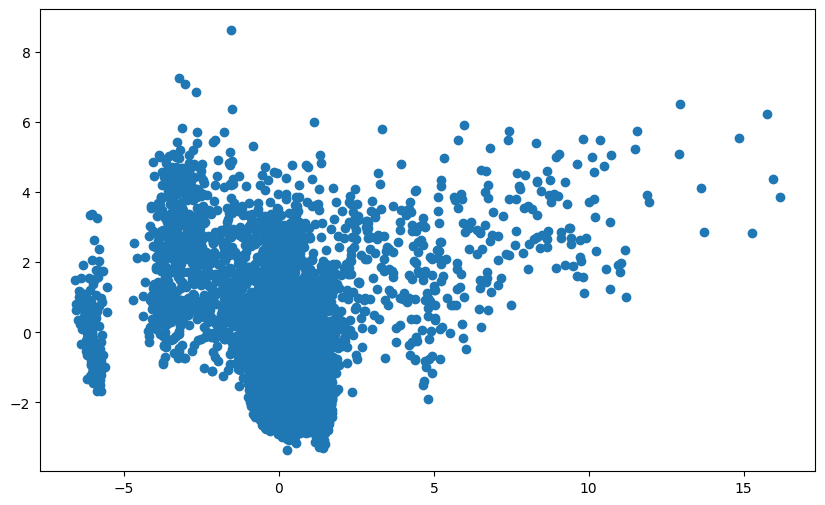

In [38]:
plt.figure(figsize = (10,6))
# Thành phần comp số 1
pca_1 = pca_scale_cancer_data[:, 0]
# Thành phần comp số 2
pca_2 = pca_scale_cancer_data[:, 1]

# Vẽ đồ thị
plt.scatter(x=pca_1, y = pca_2)